**Final Hypothesis: Reducing Travel (i.e. staying at home) Reduced COVID**

(Prina) 1: Hypothesis 1: Reducing number of trips reduced the subsequent COVID-19 Case Count - Regression

The purpose of this study is to prove that NULL Hypothesies is not true on New COVID cases changed due to number of trips people travelled

Steps taken for this analysis:

1) after_covid data is used for this analysis
2) Heatmap is created to show that highly corelated data should not be paired together.Result saved in output_data/Corr_heatmap.png
3) Regplot to show that the data is Linear.The straight line shows that the data is linear. Result saved in output_data/Plot_Linear_regression.png
4) Linear Regression is run on "New COVID Cases" and "Number of Trips". Train data is 80% and Validation(Test) data is 20%
   Training R^2 score,Validation R^2 score and Feature coefficient results is printed
5) Residual plot to prove the Linear Regression is created. The result is saved as is saved as output_data/Residual_Plot.png
6) Fancy residual plot using Visualizer is created to prove the Linear Regression. The result is saved as is saved as output_data/visualizer_residual_plot.png
7) QQ-Plot and Histogram is created to show that the results are left-skewed. The results is saved as output_data/QQ-Plot.png

In [94]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import RadViz

In [95]:
#Read After Covid Data and display rows
path = "output_data/after_covid.csv"
after_covid_df = pd.read_csv(path, encoding="UTF-8")
after_covid_df.head()

,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,CA,3570660,2234,58090,154,2021-04-01,11474065.0,28038158.0,107561279.0,29778606.0,26282896.0,12531005.0,15269950.0,14726338.0,5657090.0,2044897.0,918115.0,239073.0,113309.0
1,CA,3685032,644,62011,5,2021-05-31,10587959.0,28924264.0,121673931.0,38312879.0,30569304.0,14023600.0,15608127.0,14034739.0,5227230.0,2354560.0,1178859.0,254375.0,110258.0
2,NE,0,0,0,0,2020-02-06,354678.0,1574590.0,7285139.0,1853508.0,1951163.0,911062.0,1085616.0,899487.0,324464.0,160810.0,74008.0,16664.0,8357.0
3,ME,3910,22,123,2,2020-07-30,307281.0,1031123.0,4273710.0,934145.0,974133.0,527005.0,653197.0,726190.0,291651.0,114691.0,40709.0,6813.0,5176.0
4,MS,280182,1059,6730,13,2021-02-02,465635.0,2520895.0,10637591.0,2451371.0,2376422.0,1244226.0,1733520.0,1809314.0,679235.0,243345.0,81689.0,15460.0,3009.0


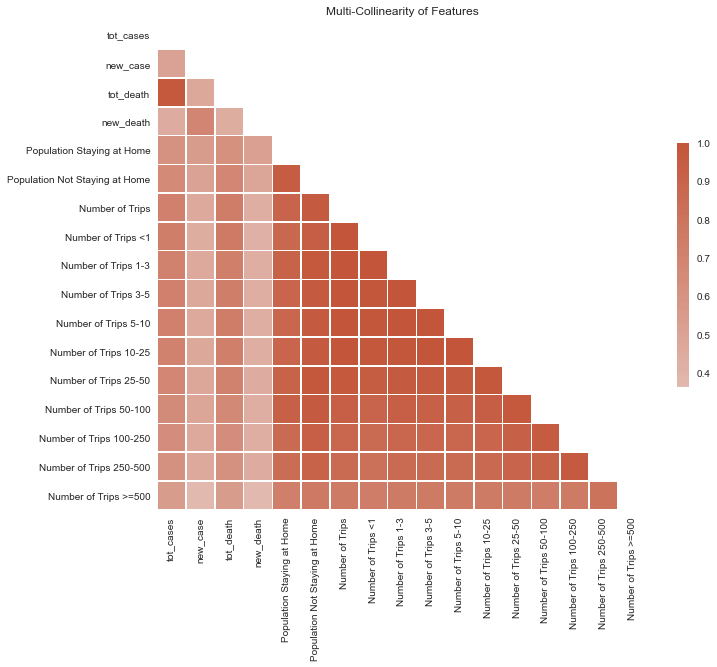

In [96]:
#As the color becomes darker that means that those variables are more highly correlated and should not be paired together in the same model.

#Correlation matrix:
final_corr= after_covid_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(final_corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(final_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Multi-Collinearity of Features')
plt.show()

#The heatmap is saved as output_data/Corr_heatmap.png

In [97]:
#Creating List for Linear Regression model:

y=after_covid_df[['new_case']]
x=after_covid_df[['Number of Trips']]

<AxesSubplot:xlabel='new_case', ylabel='Number of Trips'>

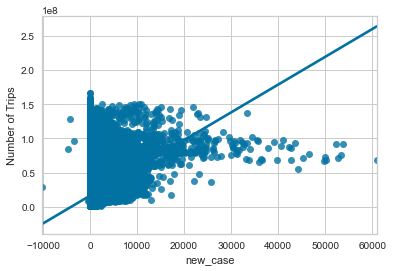

In [98]:
# use regplot to show that the data is Linear.The straight line shows that the data is linear
sns.regplot(x = "new_case",
            y = "Number of Trips", 
            ci = None,
            data = after_covid_df)
# The regplot is saved in output_data/Plot_Linear_regression.png

In [99]:
#Linear Regression. Finding R^2 score for Training and Validation Data
#Training data size is 80%
#Validation data size is 20%

X_train, X_val, y_train, y_val=train_test_split(x,y,test_size=0.2,random_state=42)

lr_model = LinearRegression()

fit = lr_model.fit(X_train,y_train)

train_score=lr_model.score(X_train,y_train)

val_score=lr_model.score(X_val,y_val)

print('Training R^2 score was:', train_score ,' which shows low corelation in train score')
print('Validation R^2 score was:', val_score,' which shows low corelation in validation score')
print('Feature coefficient results:', lr_model.coef_,' real number is = 0.0000534177865')

Training R^2 score was: 0.21733333472916216  which shows low corelation in train score
Validation R^2 score was: 0.2112049904505935  which shows low corelation in validation score
Feature coefficient results: [[5.34177865e-05]]  real number is = 0.0000534177865


0.2112049904505935


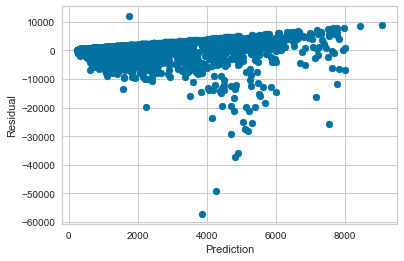

In [100]:
#Create residual plot for validation dataset:
#A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable
# If the plot shows random pattern then the data is good fit for Linear model

y_predict=lr_model.predict(X_val).tolist()
y_predict10=[]
for item in y_predict:
    for j in item:
        y_predict10.append(j)
print(fit.score(X_val,y_val))
resid=y_predict10-y_val.new_case ## standardize the observation
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.scatter(lr_model.predict(X_val), resid)
plt.show()

# Output of Residual Plot is saved as output_data/Residual_Plot.png

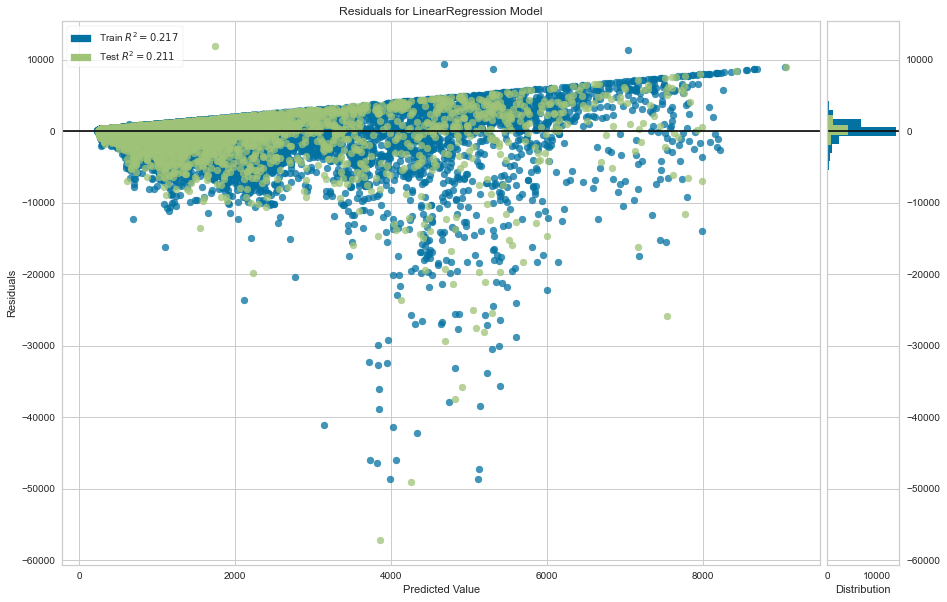

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
#Create fancy Residual plot for better visualization:

visualizer = RadViz(size=(1080, 720)) # Size the plot
visualizer = ResidualsPlot(lr_model, hist=True) # draw the plot using Linear Regression
visualizer.fit(X_train,y_train) # Fit the training data to the visualizer
visualizer.score(X_val,y_val) # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

# Visualizer Output is saved as output_data/visualizer_residual_plot.png

Conclusion:

#   The fact that residuals are scattered randomly across the horizontal axis indicates that the linear model is adequate for the data. If there is a pattern in the residuals, we may conclude that the linear model is not the best option and that a non-linear model is required.

<ipython-input-102-68ba810b9724>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels("Theoretical Quantile",fontsize=8)
<ipython-input-102-68ba810b9724>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels("Ordered Values",fontsize=8)


Text(0.5, 1.0, 'Residual Histogram')

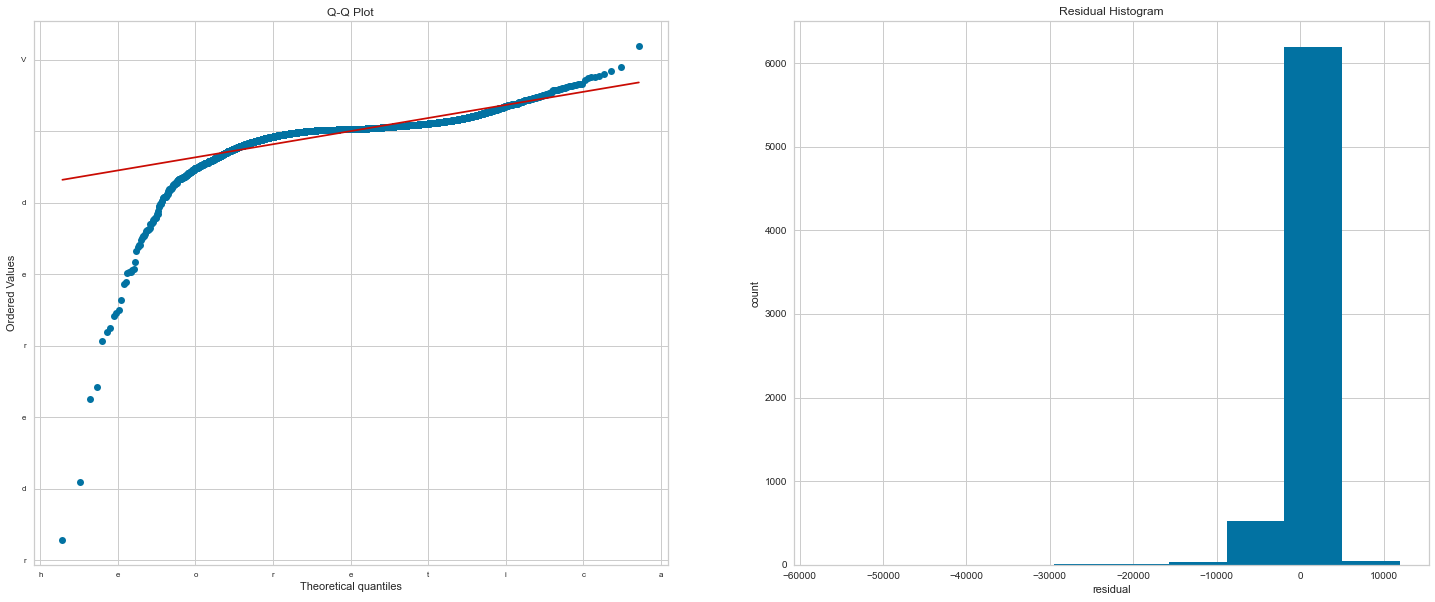

In [102]:
# QQ Plot and residual histogram:

a4_dims = (25, 10)
f, ax = plt.subplots(1,2,figsize=a4_dims)
z = resid # standardize the observation

stats.probplot(z, dist="norm", plot=ax[0])
ax[0].set_title("Residual")
ax[0].set_title("Q-Q Plot")
ax[0].set_xticklabels("Theoretical Quantile",fontsize=8)
ax[0].set_yticklabels("Ordered Values",fontsize=8)
ax[1].hist(z)
ax[1].set_xlabel("residual")
ax[1].set_ylabel("count")
ax[1].set_title("Residual Histogram")

# Output of QQ-Polt and Histrogram is saved as output_data/QQ-Plot.png

Conclusion: 
    The conclusion is that number of trips do not drive new cases. Hence, the hypothesies is not NULL.
    
    If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution is left-skewed (or negatively skewed). This means that the data is not normally distributed